# Theoretical performance of Bagging Ensemble

In [2]:
import sys
sys.path.insert(1, '../')

from Utils import *
from modeling import *

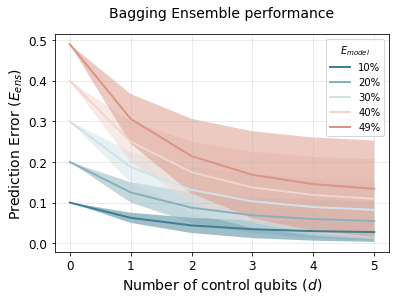

In [3]:

q = np.arange(6)
T = 2**q

colors = ['lawngreen', 'lightgreen', 'g', 'palegoldenrod']

errs = np.array([0.1, 0.2, 0.3, 0.4, 0.49])
ro = [0.00, 0.25, 0.5] #np.arange(0.5, 1, 0.05)

import seaborn as sns

colors = sns.diverging_palette(220, 20, n=6)
# colors = colors[::-1]


# plot it!
fig, ax = plt.subplots(1)

for i in np.arange(len(errs)):
    err = errs[i]
    color = colors[i]
    # print(err)
    mean = ((1+ro[1]*(T-1))/T)*err
    lower = mean - ((1+ro[0]*(T-1))/T)*err
    upper = ((1 + ro[2] * (T - 1)) / T) * err - mean
    ax.plot(q, mean, lw=2, label = str(int(err*100))+'%', color=color)
    ax.fill_between(q, mean + upper, mean - lower, facecolor=color, alpha=0.5)
#ax.set_title(r'random walkers empirical $\mu$ and $\pm \sigma$ interval')
ax.set_title('Bagging Ensemble performance', size=14).set_position([.5, 1.05])
ax.legend(loc='upper right', title = '$E_{model}$', prop=dict(size=10))
ax.set_xlabel(r'Number of control qubits $(d)$', size=14)
ax.set_ylabel('Prediction Error ($E_{ens}$)', size=14)
ax.set_yticklabels([0, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5], size=12)
ax.set_xticklabels([0, 0, 1, 2, 3, 4, 5], size=12)
ax.grid(alpha=.3)
# ax1 = ax.twiny()
# ax1.set_xlabel(r'Ensemble size $(B)$', size=14)
# ax1.set_xticklabels([1, 2, 4, 8, 16, 32], size=12)
# #ax1.set_xticks(np.linspace(.48, ax.get_xbound()[1]+5, 5))
plt.savefig('output/theory_ensemble_performance.png', dpi =300)
plt.show()